In [117]:
import requests
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift

In [2]:
# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

In [3]:
table = pandas.DataFrame(data.T, columns=names)
table

,GRB_name,GRB_name_Fermi,T0,ra,decl,pos_error,T90,T90_error,T90_start,fluence,fluence_error,redshift,'T100',GBM_located,mjd_(T0)
0,GRB250424A,None,6:52:13.431,217.5000,-35.0252,0.000082,-999,-999,-999,-999,-999,0.3100,-999,False,60789.28626656
1,GRB250421A,GRB250421443,10:38:30.832,249.0600,-59.8600,3.920132,10.2400,0.9230,10:38:30.832,2.5096e-06,3.0285e-08,-999,10.2400,True,60786.44341241
2,GRB250416C,None,17:53:59,256.4228,25.7755,-999,-999,-999,-999,-999,-999,0.9630,-999,False,60781.74582176
3,GRB250416B,None,15:46:42,103.8000,-62.2000,-999,-999,-999,-999,-999,-999,-999,-999,True,60781.65743056
4,GRB250416A,GRB250416588,14:06:21,323.8000,70.4900,-999,22.7840,1.0560,14:06:25.497,3.8016e-05,6.7097e-08,-999,27.2810,True,60781.58774306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,GRB910425B*,None,5:33:13.716,335.9500,25.7667,4.790000,430.0160,1.0940,5:33:13.716,1.3510e-06,6.3429e-08,-999,430.0160,False,48371.23140875
8717,GRB910425A*,None,0:37:45.700,91.3000,-22.7667,1.020000,90.1760,0.2860,0:37:49.924,1.3277e-05,6.8674e-08,-999,94.4000,False,48371.02622338
8718,GRB910424A*,None,19:43:25.064,201.3000,-45.4167,13.780000,3.1360,0.5900,19:43:25.064,2.4858e-08,1.0496e-08,-999,3.1360,False,48370.82181787
8719,GRB910423A*,None,19:51:15.804,193.4750,-8.3833,11.100000,208.5760,1.1180,19:51:15.804,1.6510e-07,1.7015e-08,-999,208.5760,False,48369.82726625


In [4]:
#correcting types
table = table.astype({"GRB_name": "string", "GRB_name_Fermi": "string", "ra": "float64", "decl": "float64", "pos_error": "float64", "T90": "float64", "T90_error": "float64", "fluence": "float64", "fluence_error": "float64", "redshift": "float64", "'T100'": "float64", "GBM_located": "bool", "mjd_(T0)": "float64"})

In [5]:
#rerplacing with NaNs so that the plot doesn't read them
table = table.replace(-999, np.nan)

Text(0, 0.5, 'T100')

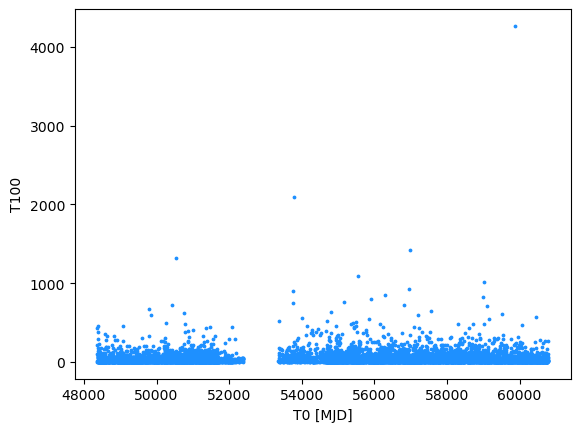

In [48]:
plt.scatter(table["mjd_(T0)"], table["'T100'"], color="dodgerblue", s=3)
plt.xlabel("T0 [MJD]")
plt.ylabel("T100")
#plt.ylim(-10, 1000)
#duration and starting time, expecting to see 2 populations, long and short GRB
#but probably it's just a pause between observations

In [77]:
xx = []
yy = []
for i in range(len(table)):
    if ~np.isnan(table["mjd_(T0)"][i]) and ~np.isnan(table["'T100'"][i]):
        xx.append(table["mjd_(T0)"][i])
        yy.append(table["'T100'"][i])

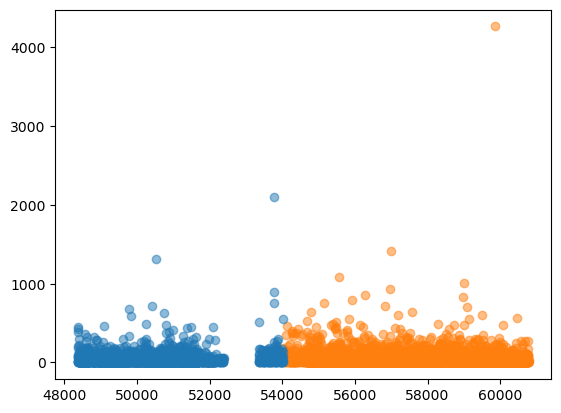

In [85]:
X = np.array([xx, yy]).T
clf = KMeans(n_clusters=2, n_init='auto')
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(X) #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C1', 'C0', 'C2']
for ii in range(3):
    plt.scatter(X[labels==ii, 0], X[labels==ii, 1], color=colors[ii], alpha=0.5)
#...mmmm

Text(0.5, 0, 'z')

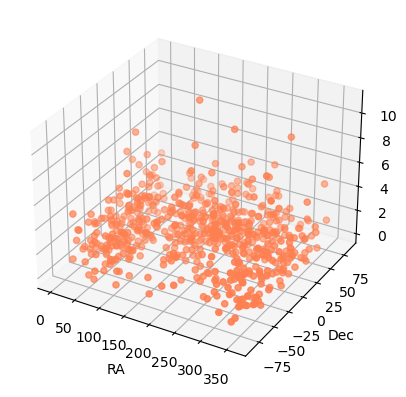

In [89]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(table["ra"], table["decl"], table["redshift"], color="coral")

ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_zlabel("z")
ax.set_title("bursts in space")

In [90]:
xx = []
yy = []
zz = []
for i in range(len(table)):
    if ~np.isnan(table["ra"][i]) and ~np.isnan(table["decl"][i]) and ~np.isnan(table["redshift"][i]):
        xx.append(table["ra"][i])
        yy.append(table["decl"][i])
        zz.append(table["redshift"][i])

Text(0.5, 1.0, 'bursts in space')

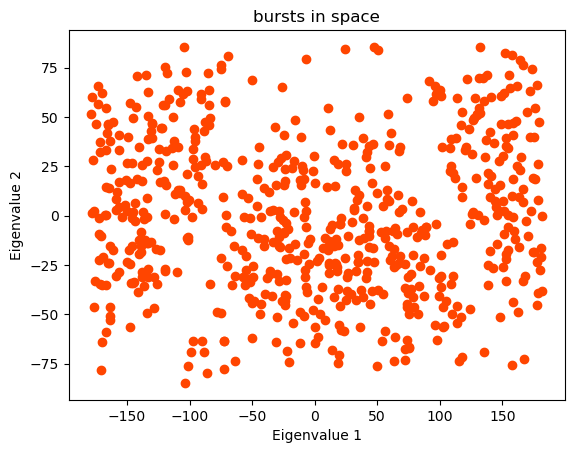

In [95]:
X = np.array([xx, yy, zz]).T
pca = PCA(n_components=2)
pca.fit(X)

X_reduced = pca.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color="orangered")
plt.xlabel('Eigenvalue 1')
plt.ylabel('Eigenvalue 2')
plt.title("bursts in space")

In [96]:
N_clusters = 3
scaler = preprocessing.StandardScaler()
clf = KMeans(N_clusters, n_init='auto')
clf.fit(scaler.fit_transform(X_reduced))

C:\Users\giuli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

Text(0, 0.5, 'Eigenvalue 2')

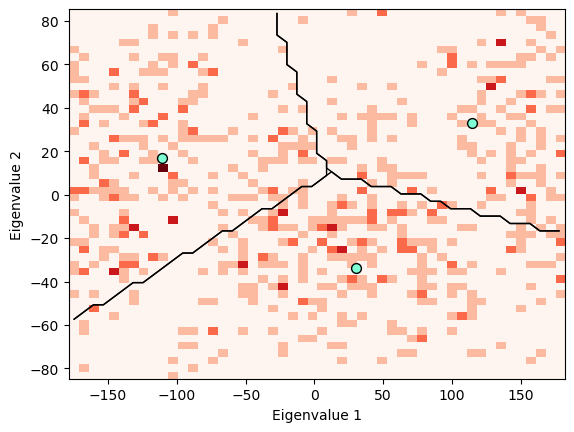

In [116]:
#2D histogram
H, xedges, yedges = np.histogram2d(X_reduced[:,0], X_reduced[:,1], 50)
plt.imshow(H.T, origin="lower", interpolation="nearest", aspect="auto", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Reds")
#cluster centres
cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=50, c="aquamarine", edgecolors="k")
#cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])
Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T
H = clf.predict(scaler.transform(Xgrid)).reshape((50, 50))
for i in range(N_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0
    plt.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
    H = clf.predict(scaler.transform(Xgrid)).reshape((50, 50))
    
plt.xlim(xedges[0], xedges[-1])
plt.ylim(yedges[0], yedges[-1])

plt.xlabel('Eigenvalue 1')
plt.ylabel('Eigenvalue 2')

In [132]:
scaler = preprocessing.StandardScaler()
bandwidth = 0.8 #bigger gives 10 clusters, smaller gives 2
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(scaler.fit_transform(X_reduced))

labels_unique = np.unique(ms.labels_)
N_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print("number of estimated clusters :", N_clusters)

[-1  0  1  2]
number of estimated clusters : 3


Text(0, 0.5, 'Eigenvalue 2')

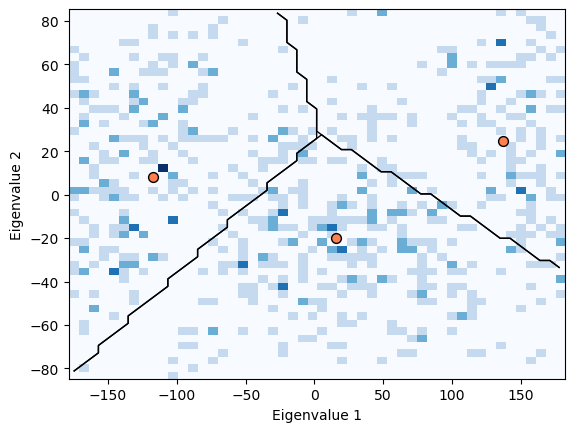

In [133]:
#2D histogram
H, xedges, yedges = np.histogram2d(X_reduced[:,0], X_reduced[:,1], 50)
plt.imshow(H.T, origin="lower", interpolation="nearest", aspect="auto", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap="Blues")
#cluster centres
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=50, c="coral", edgecolors="k")
#cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])
Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T
H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))
for i in range(N_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0
    plt.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
    H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))
    
plt.xlim(xedges[0], xedges[-1])
plt.ylim(yedges[0], yedges[-1])

plt.xlabel('Eigenvalue 1')
plt.ylabel('Eigenvalue 2')

In [136]:
label = ms.labels_

Text(0.5, 0.92, 'bursts in space')

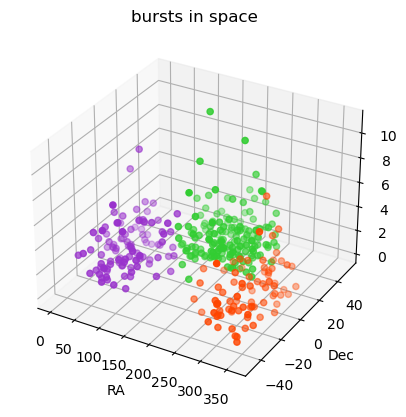

In [145]:
colors = ["limegreen", "darkorchid", "orangered"]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(3):
    ax.scatter(X[label==i, 0], X[label==i, 1], X[label==i, 2], color=colors[i])

ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_zlabel("z")
ax.set_title("bursts in space")